In [3]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action="ignore")
pd.set_option('display.max_columns', None)
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import OneHotEncoder

In [12]:
df=pd.read_csv("/content/건강검진 (1).csv")

In [13]:
df

,YEAR,ID,SEX,AGE_GROUP,SIDO,HEIGHT,WEIGHT,WAIST,BP_HIGH,BP_LWST,BLDS,TOT_CHOLE,TRIGLYCERIDE,HDL_CHOLE,LDL_CHOLE,HMG,OLIG_PROTE_CD,CREATININE,SGOT_AST,SGPT_ALT,GAMMA_GTP,SMK_STAT_TYPE_CD,DRK_YN,BMI,OBESITY,DYSLIPIDEMIA,DIABETES,HYPERTENSION,LIVER_ABNORMAL,KIDNEY_ABNORMAL,ANEMIA
0,2017,1,1,8,43,170,75,90.0,120,80,99,193.0,92.0,48.0,126.0,17.1,1,1.0,21.0,35.0,40.0,1,1,26.0,class1,False,normal,pre,False,False,False
1,2017,2,1,7,11,180,80,89.0,130,82,106,228.0,121.0,55.0,148.0,15.8,1,0.9,20.0,36.0,27.0,3,0,24.7,pre,False,pre,pre,False,False,False
2,2017,3,1,9,41,165,75,91.0,120,70,98,136.0,104.0,41.0,74.0,15.8,1,0.9,47.0,32.0,68.0,1,0,27.5,class1,False,normal,pre,True,False,False
3,2017,4,1,11,48,175,80,91.0,145,87,95,201.0,106.0,76.0,104.0,17.6,1,1.1,29.0,34.0,18.0,1,0,26.1,class1,False,normal,stage1,False,False,False
4,2017,5,1,11,30,165,60,80.0,138,82,101,199.0,104.0,61.0,117.0,13.8,1,0.8,19.0,12.0,25.0,1,0,22.0,normal,False,pre,pre,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2386508,2022,2134210,1,6,43,170,90,98.8,128,84,88,245.0,150.0,35.0,180.0,15.8,1,0.9,95.0,251.0,77.0,1,1,31.1,class2,True,normal,pre,True,False,False
2386509,2022,1686113,2,15,27,150,85,116.0,136,81,134,240.0,108.0,73.0,145.0,12.4,1,1.4,59.0,49.0,25.0,1,0,37.8,class3,True,diabetes,pre,True,False,False
2386510,2022,902951,1,12,45,165,80,98.2,119,83,181,205.0,191.0,47.0,120.0,15.7,1,1.0,48.0,82.0,60.0,2,1,29.4,class1,False,diabetes,pre,True,False,False
2386511,2022,3721315,1,6,47,175,65,75.4,109,60,91,178.0,61.0,54.0,112.0,13.7,1,1.1,245.0,72.0,17.0,2,1,21.2,normal,False,normal,normal,True,False,False


In [ ]:
df.shape

(2386513, 31)

In [ ]:
df.head()

,YEAR,ID,SEX,AGE_GROUP,SIDO,HEIGHT,WEIGHT,WAIST,BP_HIGH,BP_LWST,BLDS,TOT_CHOLE,TRIGLYCERIDE,HDL_CHOLE,LDL_CHOLE,HMG,OLIG_PROTE_CD,CREATININE,SGOT_AST,SGPT_ALT,GAMMA_GTP,SMK_STAT_TYPE_CD,DRK_YN,BMI,OBESITY,DYSLIPIDEMIA,DIABETES,HYPERTENSION,LIVER_ABNORMAL,KIDNEY_ABNORMAL,ANEMIA
0,2017,1,1,8,43,170,75,90.0,120,80,99,193.0,92.0,48.0,126.0,17.1,1,1.0,21.0,35.0,40.0,1,1,26.0,class1,False,normal,pre,False,False,False
1,2017,2,1,7,11,180,80,89.0,130,82,106,228.0,121.0,55.0,148.0,15.8,1,0.9,20.0,36.0,27.0,3,0,24.7,pre,False,pre,pre,False,False,False
2,2017,3,1,9,41,165,75,91.0,120,70,98,136.0,104.0,41.0,74.0,15.8,1,0.9,47.0,32.0,68.0,1,0,27.5,class1,False,normal,pre,True,False,False
3,2017,4,1,11,48,175,80,91.0,145,87,95,201.0,106.0,76.0,104.0,17.6,1,1.1,29.0,34.0,18.0,1,0,26.1,class1,False,normal,stage1,False,False,False
4,2017,5,1,11,30,165,60,80.0,138,82,101,199.0,104.0,61.0,117.0,13.8,1,0.8,19.0,12.0,25.0,1,0,22.0,normal,False,pre,pre,False,False,False


In [ ]:
df.tail()

,YEAR,ID,SEX,AGE_GROUP,SIDO,HEIGHT,WEIGHT,WAIST,BP_HIGH,BP_LWST,BLDS,TOT_CHOLE,TRIGLYCERIDE,HDL_CHOLE,LDL_CHOLE,HMG,OLIG_PROTE_CD,CREATININE,SGOT_AST,SGPT_ALT,GAMMA_GTP,SMK_STAT_TYPE_CD,DRK_YN,BMI,OBESITY,DYSLIPIDEMIA,DIABETES,HYPERTENSION,LIVER_ABNORMAL,KIDNEY_ABNORMAL,ANEMIA
2386508,2022,2134210,1,6,43,170,90,98.8,128,84,88,245.0,150.0,35.0,180.0,15.8,1,0.9,95.0,251.0,77.0,1,1,31.1,class2,True,normal,pre,True,False,False
2386509,2022,1686113,2,15,27,150,85,116.0,136,81,134,240.0,108.0,73.0,145.0,12.4,1,1.4,59.0,49.0,25.0,1,0,37.8,class3,True,diabetes,pre,True,False,False
2386510,2022,902951,1,12,45,165,80,98.2,119,83,181,205.0,191.0,47.0,120.0,15.7,1,1.0,48.0,82.0,60.0,2,1,29.4,class1,False,diabetes,pre,True,False,False
2386511,2022,3721315,1,6,47,175,65,75.4,109,60,91,178.0,61.0,54.0,112.0,13.7,1,1.1,245.0,72.0,17.0,2,1,21.2,normal,False,normal,normal,True,False,False
2386512,2022,4901217,2,14,11,150,40,74.1,137,87,173,170.0,88.0,58.0,94.0,14.3,1,0.9,58.0,42.0,27.0,1,0,17.8,normal,False,diabetes,pre,True,False,False


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2386513 entries, 0 to 2386512
Data columns (total 31 columns):
 #   Column            Dtype  
---  ------            -----  
 0   YEAR              int64  
 1   ID                int64  
 2   SEX               int64  
 3   AGE_GROUP         int64  
 4   SIDO              int64  
 5   HEIGHT            int64  
 6   WEIGHT            int64  
 7   WAIST             float64
 8   BP_HIGH           int64  
 9   BP_LWST           int64  
 10  BLDS              int64  
 11  TOT_CHOLE         float64
 12  TRIGLYCERIDE      float64
 13  HDL_CHOLE         float64
 14  LDL_CHOLE         float64
 15  HMG               float64
 16  OLIG_PROTE_CD     int64  
 17  CREATININE        float64
 18  SGOT_AST          float64
 19  SGPT_ALT          float64
 20  GAMMA_GTP         float64
 21  SMK_STAT_TYPE_CD  int64  
 22  DRK_YN            int64  
 23  BMI               float64
 24  OBESITY           object 
 25  DYSLIPIDEMIA      bool   
 26  DIABETES      

In [ ]:
df["Year_ID"] = df["YEAR"].astype(str) + "_" + df["ID"].astype(str)

cols = ['Year_ID'] + [col for col in df.columns if col != 'Year_ID']
df = df[cols]
# 불필요한 컬럼 제거 (ID, YEAR는 UNIQUE_ID로 대체되었으므로 제거)
df = df.drop(['ID', 'YEAR'], axis=1)

In [ ]:
df.head()

,Year_ID,SEX,AGE_GROUP,SIDO,HEIGHT,WEIGHT,WAIST,BP_HIGH,BP_LWST,BLDS,TOT_CHOLE,TRIGLYCERIDE,HDL_CHOLE,LDL_CHOLE,HMG,OLIG_PROTE_CD,CREATININE,SGOT_AST,SGPT_ALT,GAMMA_GTP,SMK_STAT_TYPE_CD,DRK_YN,BMI,OBESITY,DYSLIPIDEMIA,DIABETES,HYPERTENSION,LIVER_ABNORMAL,KIDNEY_ABNORMAL,ANEMIA
0,2017_1,1,8,43,170,75,90.0,120,80,99,193.0,92.0,48.0,126.0,17.1,1,1.0,21.0,35.0,40.0,1,1,26.0,class1,False,normal,pre,False,False,False
1,2017_2,1,7,11,180,80,89.0,130,82,106,228.0,121.0,55.0,148.0,15.8,1,0.9,20.0,36.0,27.0,3,0,24.7,pre,False,pre,pre,False,False,False
2,2017_3,1,9,41,165,75,91.0,120,70,98,136.0,104.0,41.0,74.0,15.8,1,0.9,47.0,32.0,68.0,1,0,27.5,class1,False,normal,pre,True,False,False
3,2017_4,1,11,48,175,80,91.0,145,87,95,201.0,106.0,76.0,104.0,17.6,1,1.1,29.0,34.0,18.0,1,0,26.1,class1,False,normal,stage1,False,False,False
4,2017_5,1,11,30,165,60,80.0,138,82,101,199.0,104.0,61.0,117.0,13.8,1,0.8,19.0,12.0,25.0,1,0,22.0,normal,False,pre,pre,False,False,False


In [ ]:
df['OBESITY'].value_counts()

,count
OBESITY,
normal,989724
class1,799269
pre,467218
class2,112755
class3,17547


In [ ]:
df['DYSLIPIDEMIA'].value_counts()

,count
DYSLIPIDEMIA,
False,1649648
True,736865


In [ ]:
df['DIABETES'].value_counts()

,count
DIABETES,
normal,1411130
pre,775873
diabetes,199510


In [ ]:
df['HYPERTENSION'].value_counts()

,count
HYPERTENSION,
pre,1158871
normal,880765
stage1,275103
stage2,71774


In [ ]:
df['LIVER_ABNORMAL'].value_counts()

,count
LIVER_ABNORMAL,
False,2008886
True,377627


In [ ]:
df['KIDNEY_ABNORMAL'].value_counts()

,count
KIDNEY_ABNORMAL,
False,2378905
True,7608


In [ ]:
df['ANEMIA'].value_counts()

,count
ANEMIA,
False,2220221
True,166292


In [ ]:
df.describe()

,SEX,AGE_GROUP,SIDO,HEIGHT,WEIGHT,WAIST,BP_HIGH,BP_LWST,BLDS,TOT_CHOLE,TRIGLYCERIDE,HDL_CHOLE,LDL_CHOLE,HMG,OLIG_PROTE_CD,CREATININE,SGOT_AST,SGPT_ALT,GAMMA_GTP,SMK_STAT_TYPE_CD,DRK_YN,BMI
count,2.386513e+06,2.386513e+06,2.386513e+06,2.386513e+06,2.386513e+06,2.386513e+06,2.386513e+06,2.386513e+06,2.386513e+06,2.386513e+06,2.386513e+06,2.386513e+06,2.386513e+06,2.386513e+06,2.386513e+06,2.386513e+06,2.386513e+06,2.386513e+06,2.386513e+06,2.386513e+06,2.386513e+06,2.386513e+06
mean,1.438121e+00,1.083471e+01,3.365736e+01,1.626326e+02,6.420943e+01,8.198824e+01,1.234692e+02,7.634183e+01,1.015120e+02,1.966778e+02,1.282414e+02,5.700082e+01,1.144473e+02,1.432345e+01,1.108920e+00,8.622675e-01,2.691778e+01,2.679388e+01,3.793744e+01,1.598080e+00,6.275034e-01,2.414292e+01
std,4.961563e-01,2.791896e+00,1.267557e+01,9.406311e+00,1.288249e+01,1.069816e+01,1.455371e+01,9.991953e+00,2.390166e+01,4.025533e+01,8.448973e+01,1.667298e+01,3.758783e+01,1.573719e+00,4.625220e-01,4.700929e-01,2.264178e+01,2.639495e+01,5.603600e+01,7.933833e-01,4.834697e-01,3.598924e+00
min,1.000000e+00,5.000000e+00,1.100000e+01,1.300000e+02,2.500000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,9.800000e+00
25%,1.000000e+00,9.000000e+00,2.700000e+01,1.550000e+02,5.500000e+01,7.500000e+01,1.130000e+02,7.000000e+01,8.900000e+01,1.700000e+02,7.500000e+01,4.600000e+01,8.900000e+01,1.330000e+01,1.000000e+00,7.000000e-01,1.900000e+01,1.500000e+01,1.600000e+01,1.000000e+00,0.000000e+00,2.150000e+01
50%,1.000000e+00,1.100000e+01,4.100000e+01,1.650000e+02,6.500000e+01,8.200000e+01,1.220000e+02,7.600000e+01,9.700000e+01,1.950000e+02,1.070000e+02,5.500000e+01,1.130000e+02,1.440000e+01,1.000000e+00,8.000000e-01,2.300000e+01,2.100000e+01,2.400000e+01,1.000000e+00,1.000000e+00,2.390000e+01
75%,2.000000e+00,1.300000e+01,4.300000e+01,1.700000e+02,7.000000e+01,8.800000e+01,1.320000e+02,8.200000e+01,1.060000e+02,2.210000e+02,1.580000e+02,6.500000e+01,1.370000e+02,1.550000e+01,1.000000e+00,1.000000e+00,2.900000e+01,3.100000e+01,4.000000e+01,2.000000e+00,1.000000e+00,2.610000e+01
max,2.000000e+00,1.800000e+01,5.000000e+01,1.950000e+02,1.400000e+02,9.990000e+02,2.730000e+02,1.850000e+02,9.610000e+02,2.635000e+03,9.490000e+03,8.110000e+03,5.119000e+03,2.500000e+01,6.000000e+00,3.160000e+02,9.999000e+03,7.210000e+03,9.999000e+03,3.000000e+00,1.000000e+00,5.620000e+01


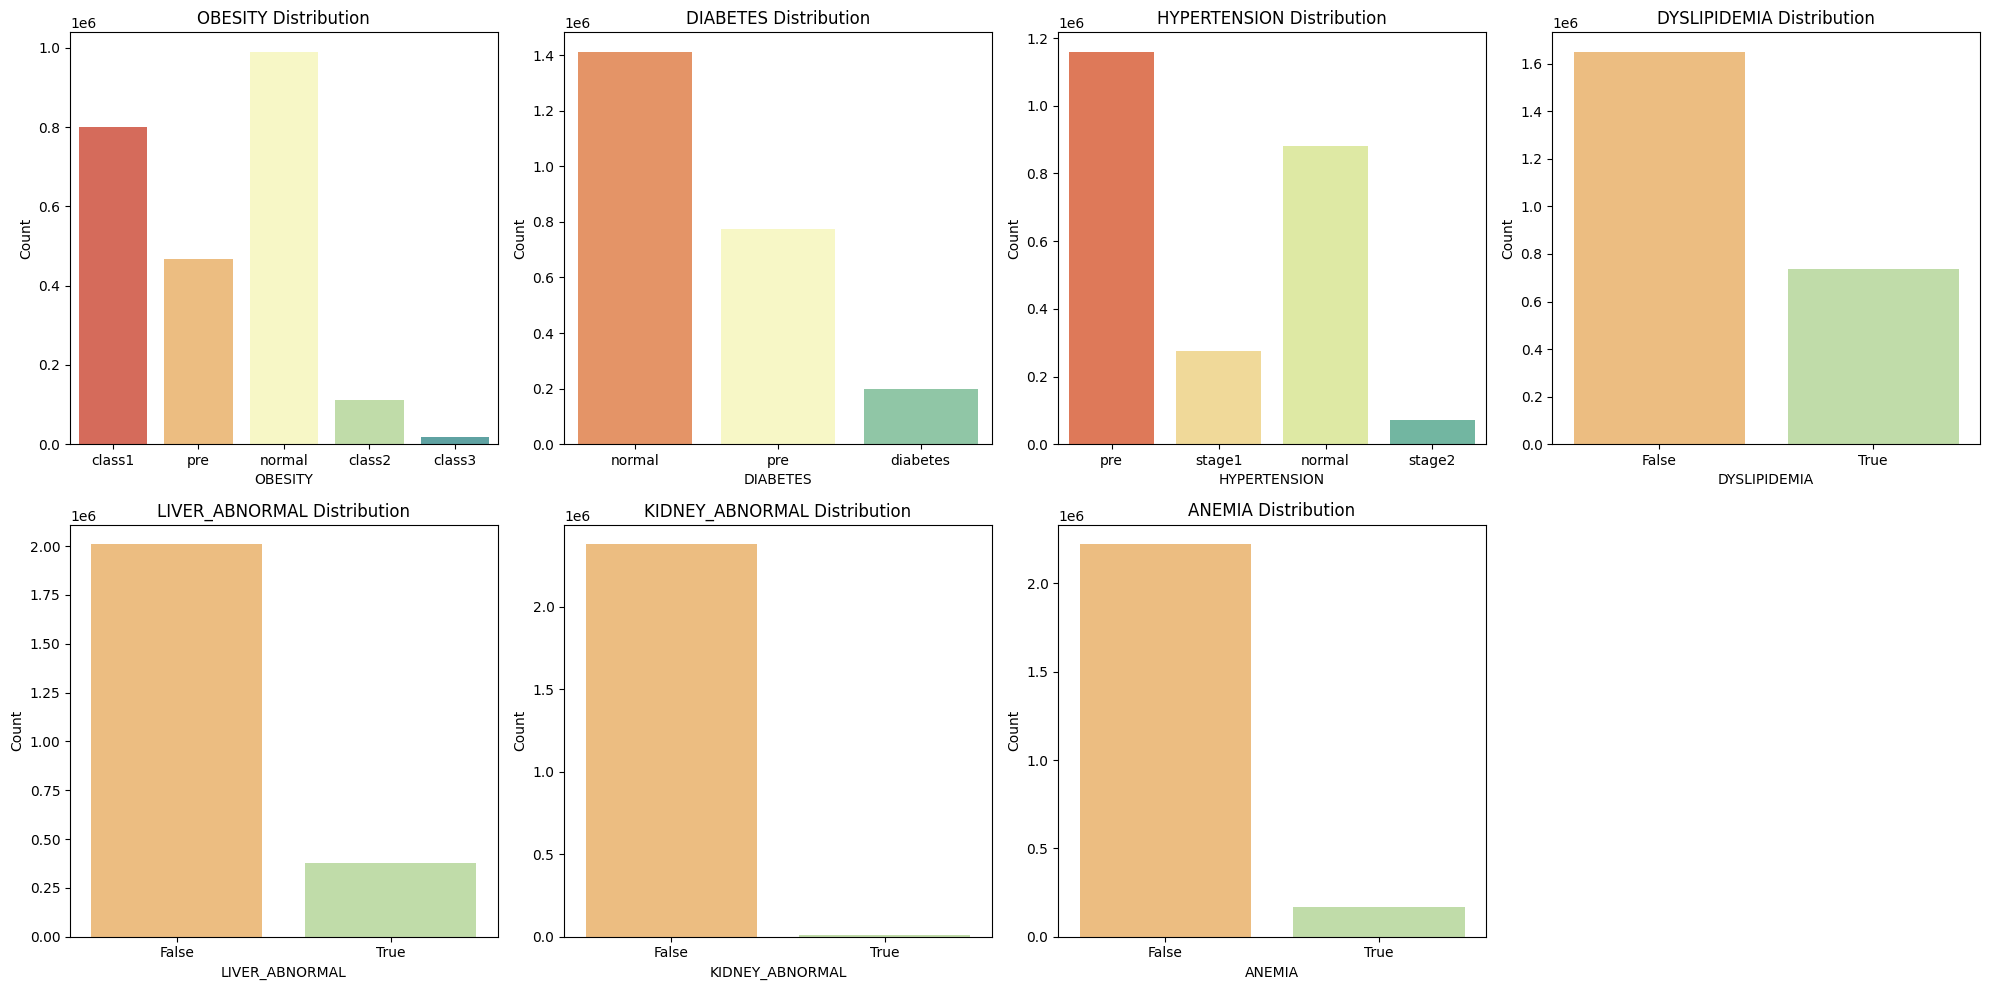

In [ ]:
# 시각화할 변수 리스트-질병 7가지
target_vars = ['OBESITY', 'DIABETES', 'HYPERTENSION', 'DYSLIPIDEMIA',
               'LIVER_ABNORMAL', 'KIDNEY_ABNORMAL', 'ANEMIA']

# 서브플롯 설정 (2행 4열: 8개의 칸 중 7개 사용)
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()  # 2차원 배열 -> 1차원으로 평탄화

# 각 변수에 대해 countplot 그리기
for i, var in enumerate(target_vars):
    sns.countplot(x=var, data=df, palette="Spectral", ax=axes[i])
    axes[i].set_title(f'{var} Distribution')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Count')

# 사용하지 않는 마지막 subplot 숨기기 (예: 8번째 subplot)
for j in range(len(target_vars), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


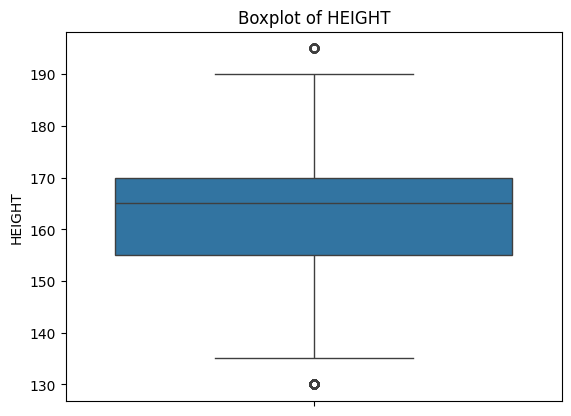


'HEIGHT' 컬럼의 이상치 개수: 492개
전체 데이터 중 이상치 비율: 0.02%


In [ ]:
sns.boxplot(y=df["HEIGHT"])  # y축에 수치형 컬럼
plt.title("Boxplot of HEIGHT")
plt.ylabel("HEIGHT")
plt.show()

# 이상치(Outlier) 계산
Q1 = df["HEIGHT"].quantile(0.25)
Q3 = df["HEIGHT"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df["HEIGHT"] < lower_bound) | (df["HEIGHT"] > upper_bound)]
num_outliers = outliers.shape[0]
total_data_points = df.shape[0]
percentage_outliers = (num_outliers / total_data_points) * 100

print(f"\n'HEIGHT' 컬럼의 이상치 개수: {num_outliers}개")
print(f"전체 데이터 중 이상치 비율: {percentage_outliers:.2f}%")

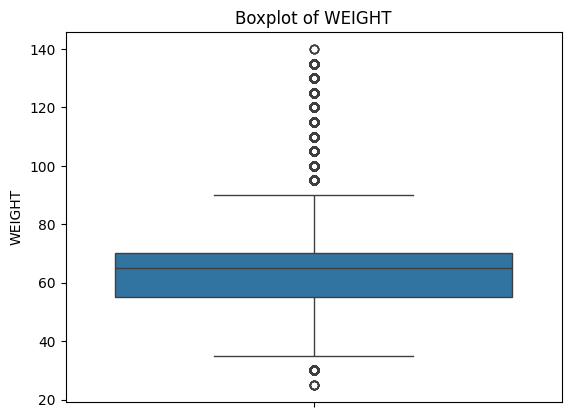


'WEIGHT' 컬럼의 이상치 개수: 59438개
전체 데이터 중 이상치 비율: 2.49%


In [ ]:
sns.boxplot(y=df["WEIGHT"])  # y축에 수치형 컬럼
plt.title("Boxplot of WEIGHT")
plt.ylabel("WEIGHT")
plt.show()

# 이상치(Outlier) 계산
Q1 = df["WEIGHT"].quantile(0.25)
Q3 = df["WEIGHT"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df["WEIGHT"] < lower_bound) | (df["WEIGHT"] > upper_bound)]
num_outliers = outliers.shape[0]
total_data_points = df.shape[0]
percentage_outliers = (num_outliers / total_data_points) * 100

print(f"\n'WEIGHT' 컬럼의 이상치 개수: {num_outliers}개")
print(f"전체 데이터 중 이상치 비율: {percentage_outliers:.2f}%")

In [ ]:
df.isnull().sum()

,0
Year_ID,0
SEX,0
AGE_GROUP,0
SIDO,0
HEIGHT,0
WEIGHT,0
WAIST,0
BP_HIGH,0
BP_LWST,0
BLDS,0


In [ ]:
#라벨인코딩, 이진은 불필요
multi_class_targets = ['OBESITY', 'DIABETES', 'HYPERTENSION'] #비만, 당뇨, 고혈압

for col in multi_class_targets:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

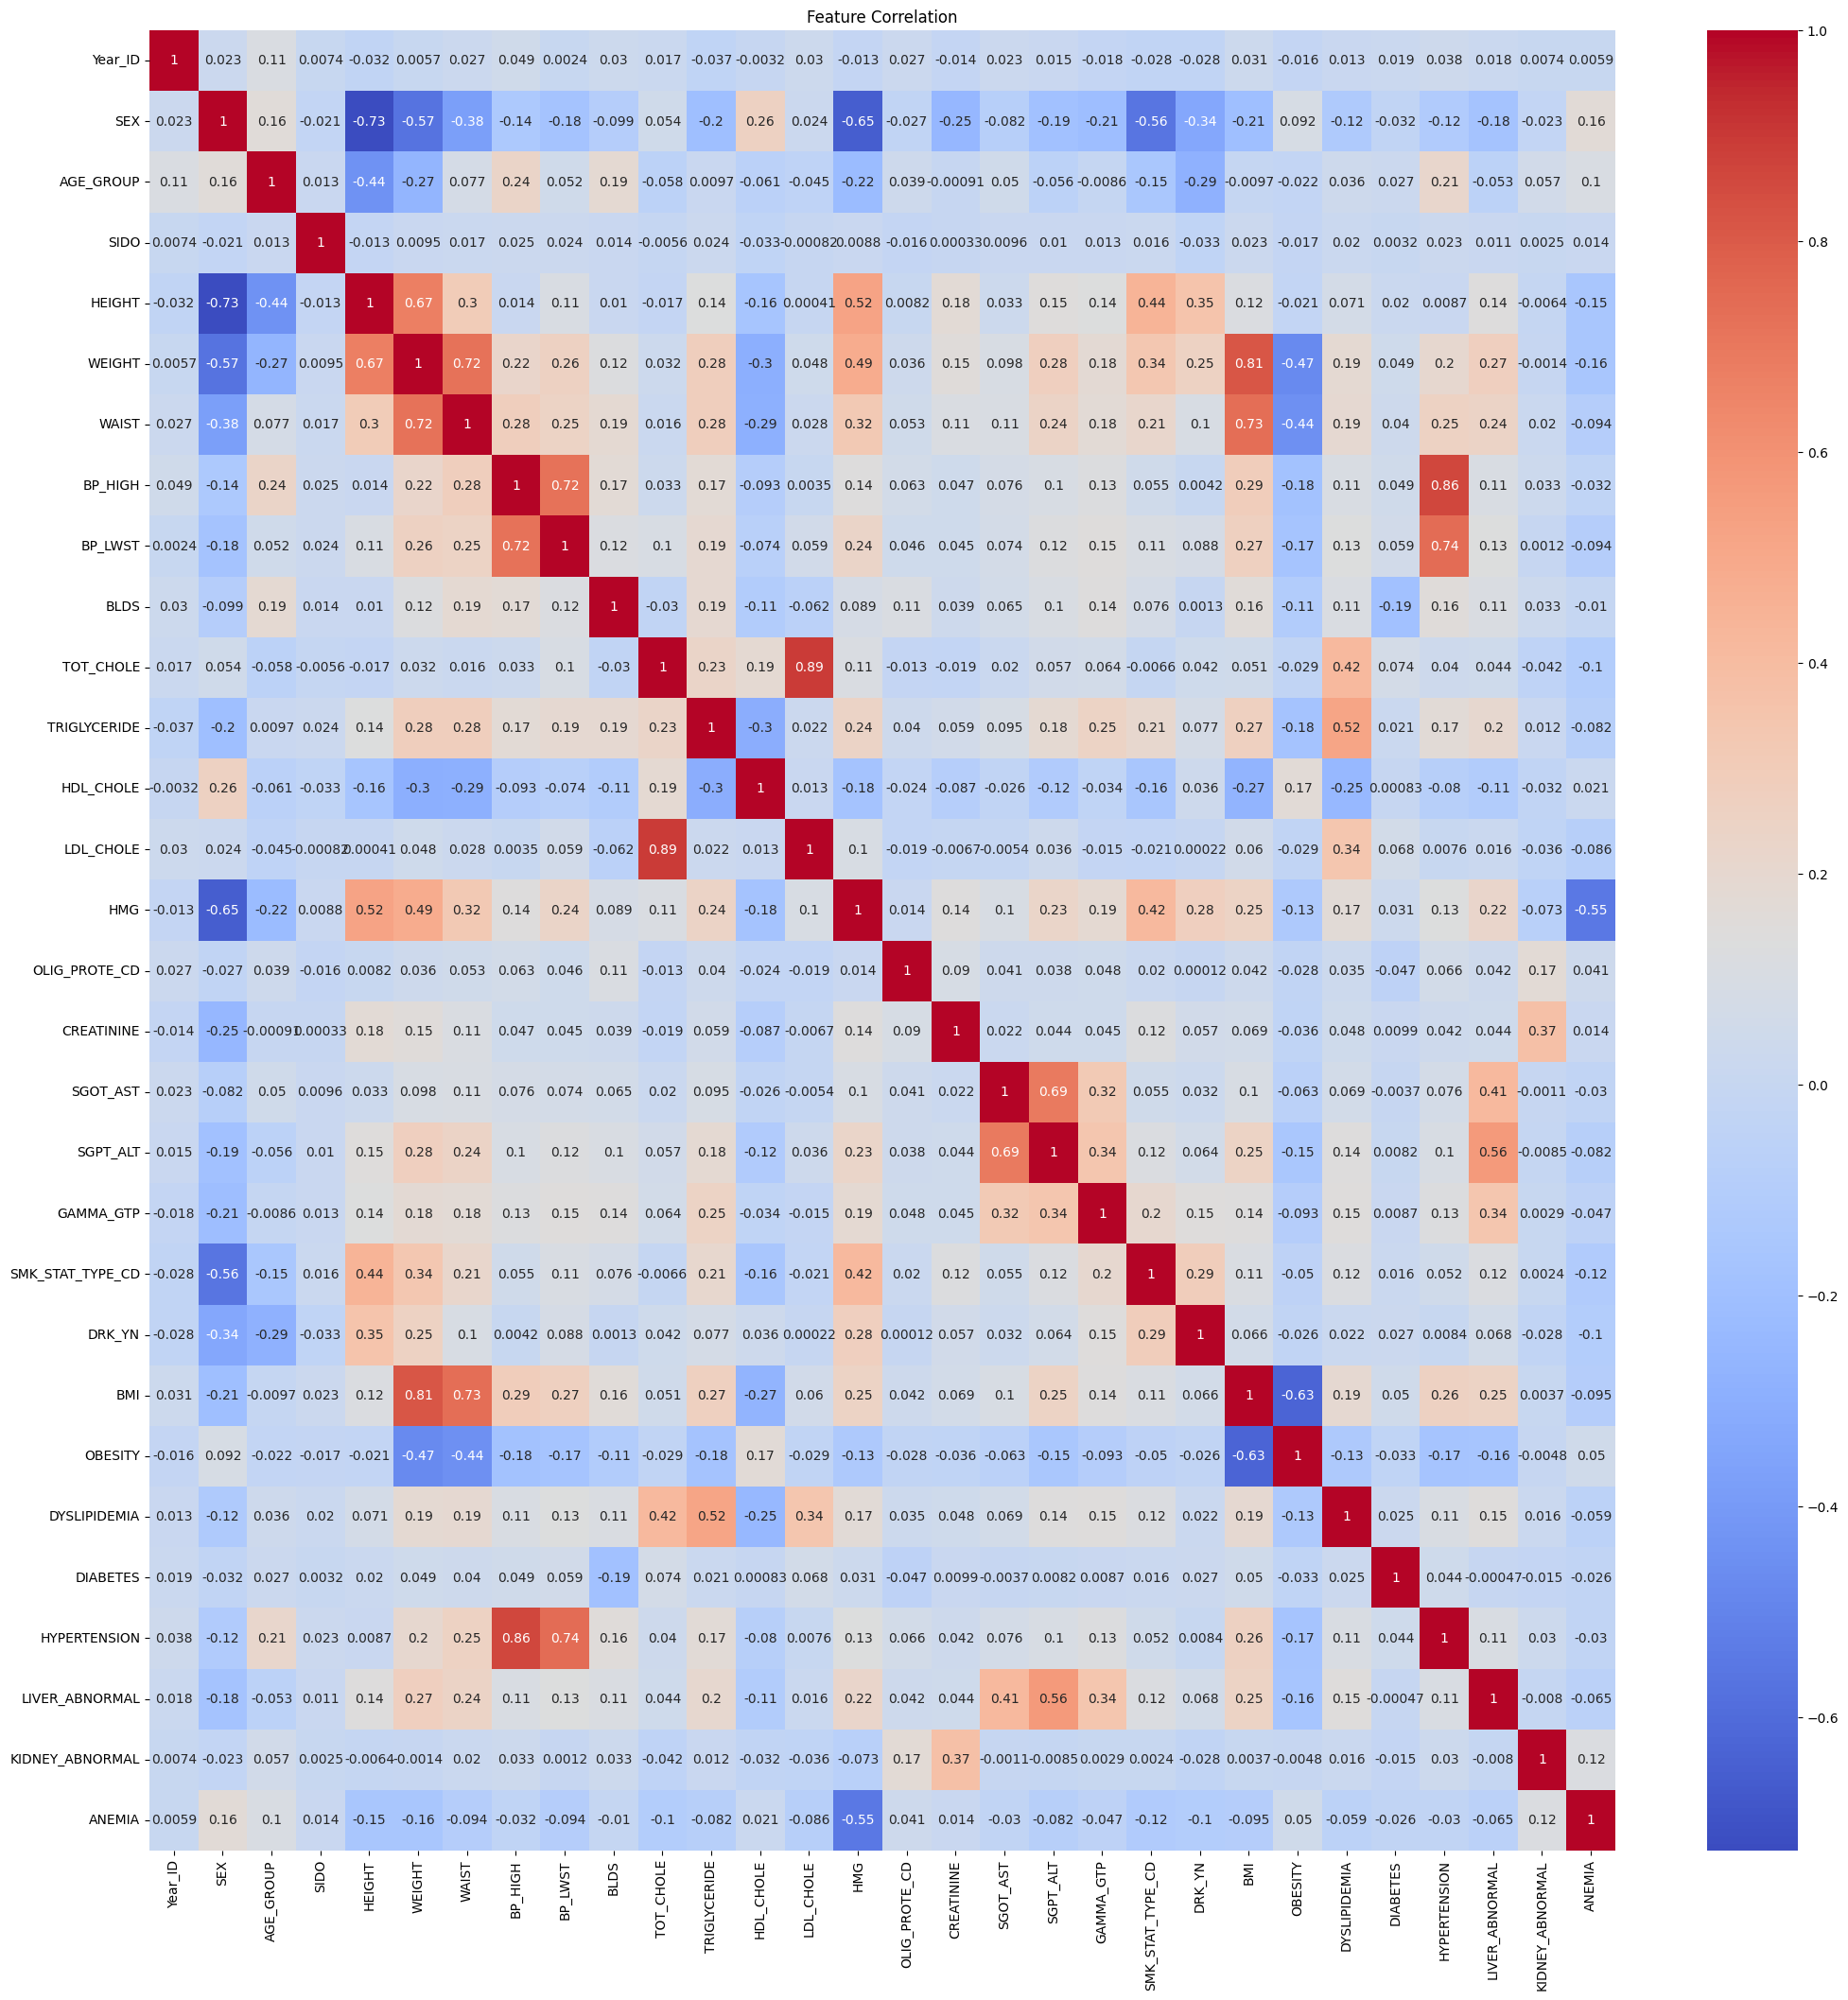

In [ ]:
# 모든 수치형 컬럼 간 상관관계 분석
corr = df.corr()
plt.figure(figsize=(25, 25))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()


In [ ]:
# 입력 변수만 추출
input_features = ["HEIGHT", "WEIGHT", "WAIST","BP_HIGH", "BP_LWST",
                  "BLDS","TOT_CHOLE", "TRIGLYCERIDE", "HDL_CHOLE",
                  "LDL_CHOLE", "HMG", "OLIG_PROTE_CD",
                  "CREATININE", "SGOT_AST", "SGPT_ALT", "GAMMA_GTP",
                  "SMK_STAT_TYPE_CD", "DRK_YN", "BMI"]

# RobustScaler 적용
scaler = RobustScaler()
df[input_features] = scaler.fit_transform(df[input_features])

In [ ]:
df

,Year_ID,SEX,AGE_GROUP,SIDO,HEIGHT,WEIGHT,WAIST,BP_HIGH,BP_LWST,BLDS,TOT_CHOLE,TRIGLYCERIDE,HDL_CHOLE,LDL_CHOLE,HMG,OLIG_PROTE_CD,CREATININE,SGOT_AST,SGPT_ALT,GAMMA_GTP,SMK_STAT_TYPE_CD,DRK_YN,BMI,OBESITY,DYSLIPIDEMIA,DIABETES,HYPERTENSION,LIVER_ABNORMAL,KIDNEY_ABNORMAL,ANEMIA
0,2017_1,1,8,43,0.333333,0.666667,0.615385,-0.105263,0.333333,0.117647,-0.039216,-0.180723,-0.368421,0.270833,1.227273,0.0,0.666667,-0.2,0.8750,0.666667,0.0,0.0,0.456522,0,False,1,1,False,False,False
1,2017_2,1,7,11,1.000000,1.000000,0.538462,0.421053,0.500000,0.529412,0.647059,0.168675,0.000000,0.729167,0.636364,0.0,0.333333,-0.3,0.9375,0.125000,2.0,-1.0,0.173913,4,False,2,1,False,False,False
2,2017_3,1,9,41,0.000000,0.666667,0.692308,-0.105263,-0.500000,0.058824,-1.156863,-0.036145,-0.736842,-0.812500,0.636364,0.0,0.333333,2.4,0.6875,1.833333,0.0,-1.0,0.782609,0,False,1,1,True,False,False
3,2017_4,1,11,48,0.666667,1.000000,0.692308,1.210526,0.916667,-0.117647,0.117647,-0.012048,1.105263,-0.187500,1.454545,0.0,1.000000,0.6,0.8125,-0.250000,0.0,-1.0,0.478261,0,False,1,2,False,False,False
4,2017_5,1,11,30,0.000000,-0.333333,-0.153846,0.842105,0.500000,0.235294,0.078431,-0.036145,0.315789,0.083333,-0.272727,0.0,0.000000,-0.4,-0.5625,0.041667,0.0,-1.0,-0.413043,3,False,2,1,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2386508,2022_2134210,1,6,43,0.333333,1.666667,1.292308,0.315789,0.666667,-0.529412,0.980392,0.518072,-1.052632,1.395833,0.636364,0.0,0.333333,7.2,14.3750,2.208333,0.0,0.0,1.565217,1,True,1,1,True,False,False
2386509,2022_1686113,2,15,27,-1.000000,1.333333,2.615385,0.736842,0.416667,2.176471,0.882353,0.012048,0.947368,0.666667,-0.909091,0.0,2.000000,3.6,1.7500,0.041667,0.0,-1.0,3.021739,2,True,0,1,True,False,False
2386510,2022_902951,1,12,45,0.000000,1.000000,1.246154,-0.157895,0.583333,4.941176,0.196078,1.012048,-0.421053,0.145833,0.590909,0.0,0.666667,2.5,3.8125,1.500000,1.0,0.0,1.195652,0,False,0,1,True,False,False
2386511,2022_3721315,1,6,47,0.666667,0.000000,-0.507692,-0.684211,-1.333333,-0.352941,-0.333333,-0.554217,-0.052632,-0.020833,-0.318182,0.0,1.000000,22.2,3.1875,-0.291667,1.0,0.0,-0.586957,3,False,1,0,True,False,False


이상치 제거

In [ ]:
for col in input_features:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]


In [ ]:
df.head()

,Year_ID,SEX,AGE_GROUP,SIDO,HEIGHT,WEIGHT,WAIST,BP_HIGH,BP_LWST,BLDS,TOT_CHOLE,TRIGLYCERIDE,HDL_CHOLE,LDL_CHOLE,HMG,OLIG_PROTE_CD,CREATININE,SGOT_AST,SGPT_ALT,GAMMA_GTP,SMK_STAT_TYPE_CD,DRK_YN,BMI,OBESITY,DYSLIPIDEMIA,DIABETES,HYPERTENSION,LIVER_ABNORMAL,KIDNEY_ABNORMAL,ANEMIA
0,2017_1,1,8,43,0.333333,0.666667,0.615385,-0.105263,0.333333,0.117647,-0.039216,-0.180723,-0.368421,0.270833,1.227273,0.0,0.666667,-0.2,0.8750,0.666667,0.0,0.0,0.456522,0,False,1,1,False,False,False
1,2017_2,1,7,11,1.000000,1.000000,0.538462,0.421053,0.500000,0.529412,0.647059,0.168675,0.000000,0.729167,0.636364,0.0,0.333333,-0.3,0.9375,0.125000,2.0,-1.0,0.173913,4,False,2,1,False,False,False
3,2017_4,1,11,48,0.666667,1.000000,0.692308,1.210526,0.916667,-0.117647,0.117647,-0.012048,1.105263,-0.187500,1.454545,0.0,1.000000,0.6,0.8125,-0.250000,0.0,-1.0,0.478261,0,False,1,2,False,False,False
4,2017_5,1,11,30,0.000000,-0.333333,-0.153846,0.842105,0.500000,0.235294,0.078431,-0.036145,0.315789,0.083333,-0.272727,0.0,0.000000,-0.4,-0.5625,0.041667,0.0,-1.0,-0.413043,3,False,2,1,False,False,False
6,2017_7,2,10,27,-1.000000,-0.666667,-1.000000,-1.105263,-1.500000,-0.470588,0.019608,-0.385542,0.578947,0.041667,-0.954545,0.0,0.000000,-0.4,-0.5625,-0.500000,0.0,-1.0,0.108696,4,False,1,0,False,False,False


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1493005 entries, 0 to 2386476
Data columns (total 30 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Year_ID           1493005 non-null  object 
 1   SEX               1493005 non-null  int64  
 2   AGE_GROUP         1493005 non-null  int64  
 3   SIDO              1493005 non-null  int64  
 4   HEIGHT            1493005 non-null  float64
 5   WEIGHT            1493005 non-null  float64
 6   WAIST             1493005 non-null  float64
 7   BP_HIGH           1493005 non-null  float64
 8   BP_LWST           1493005 non-null  float64
 9   BLDS              1493005 non-null  float64
 10  TOT_CHOLE         1493005 non-null  float64
 11  TRIGLYCERIDE      1493005 non-null  float64
 12  HDL_CHOLE         1493005 non-null  float64
 13  LDL_CHOLE         1493005 non-null  float64
 14  HMG               1493005 non-null  float64
 15  OLIG_PROTE_CD     1493005 non-null  float64
 16  CREAT

Q-Q plot: 빨간선에 가까우면 정규분포 만족

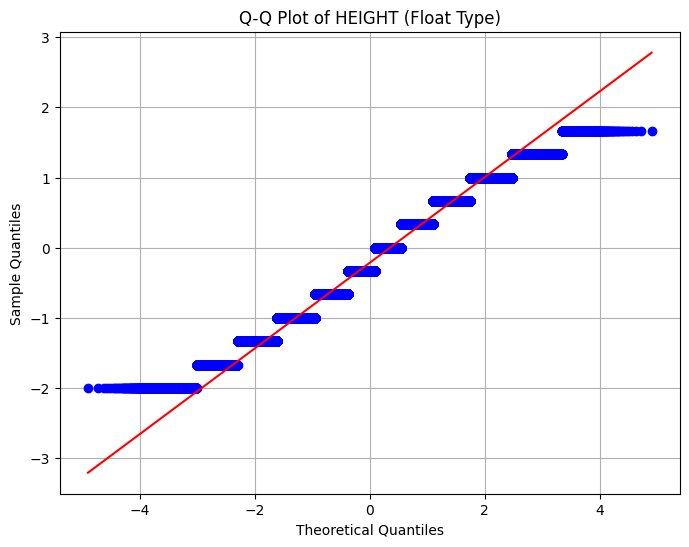

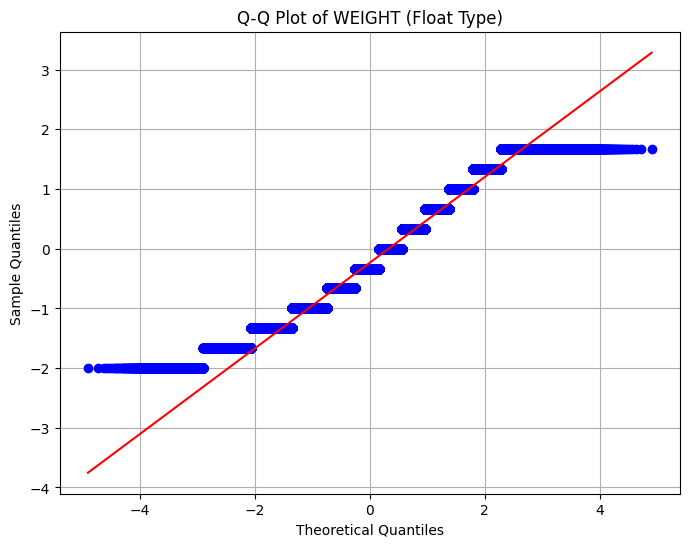

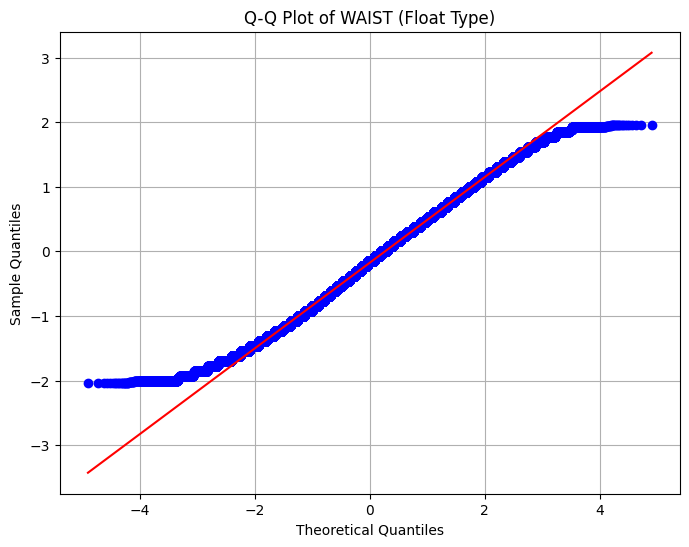

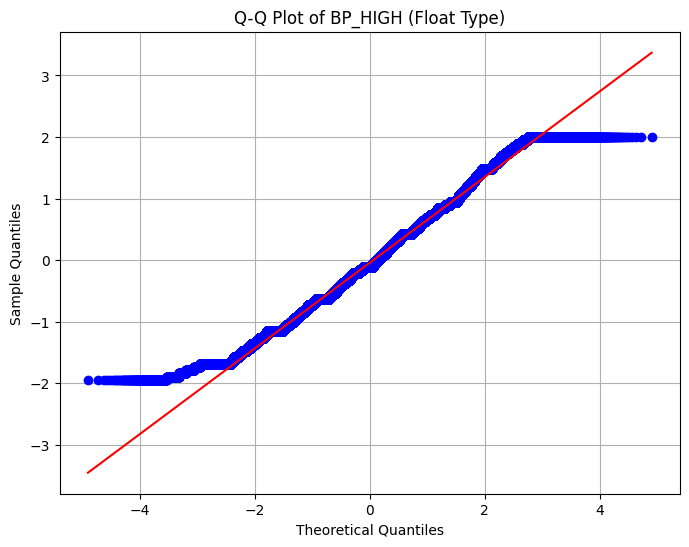

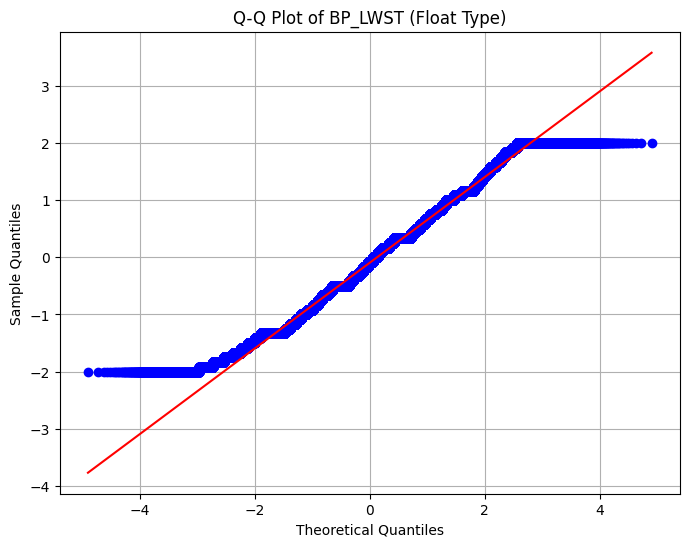

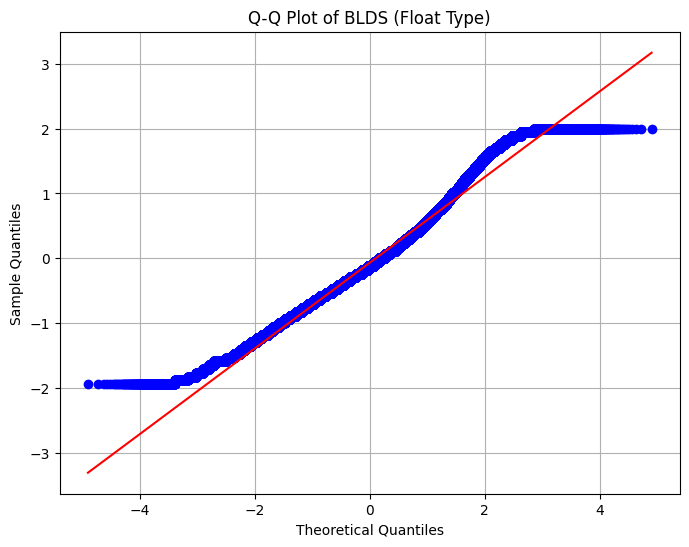

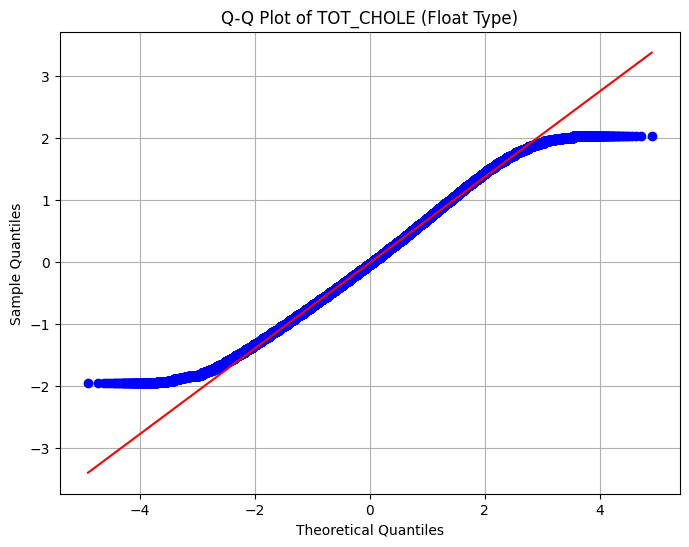

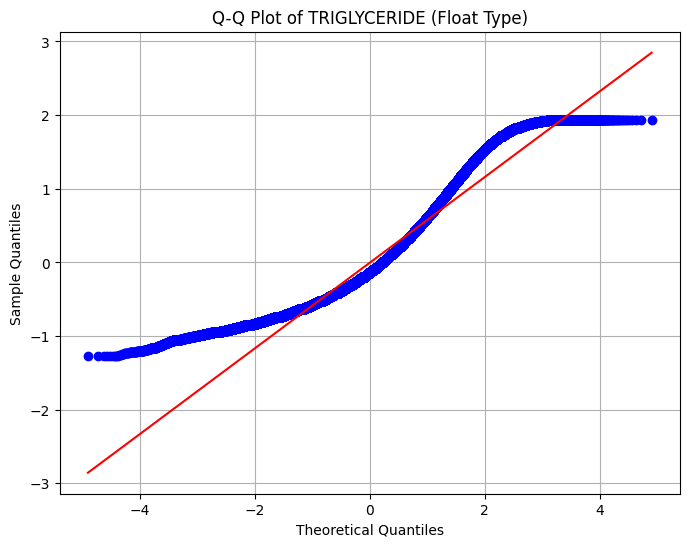

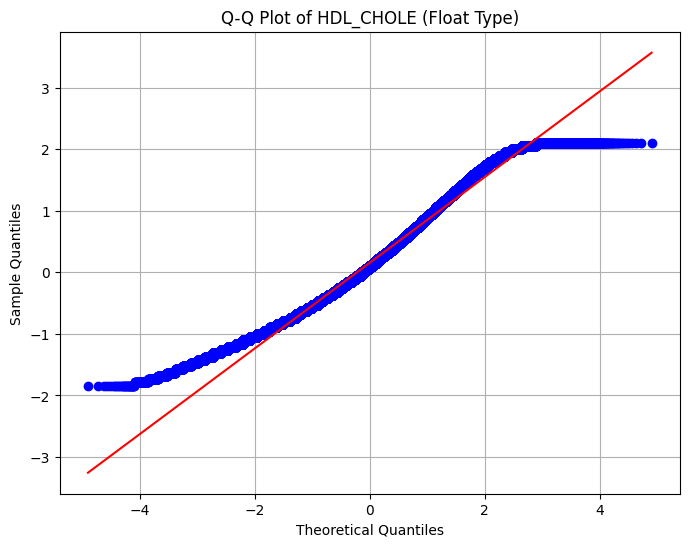

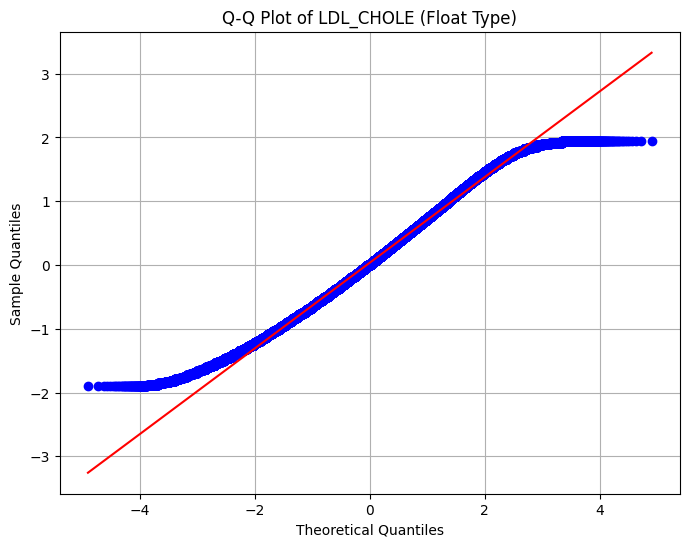

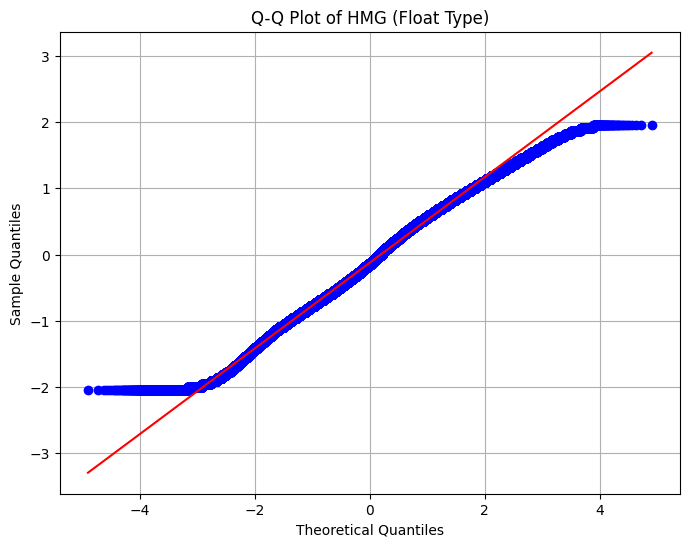

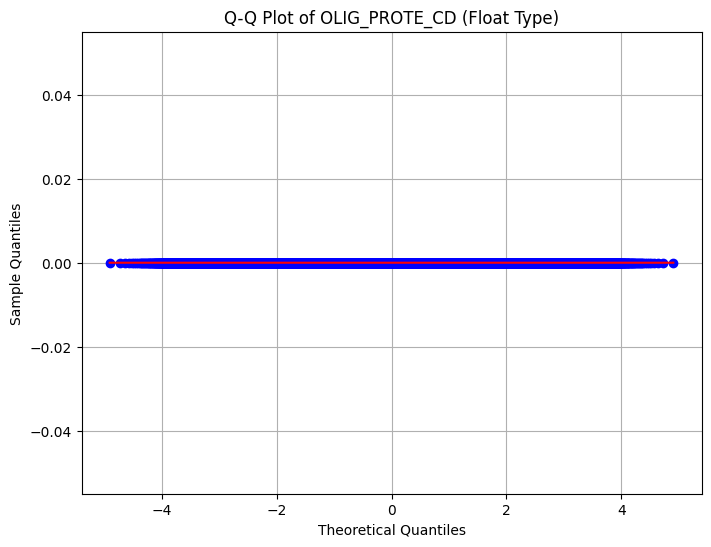

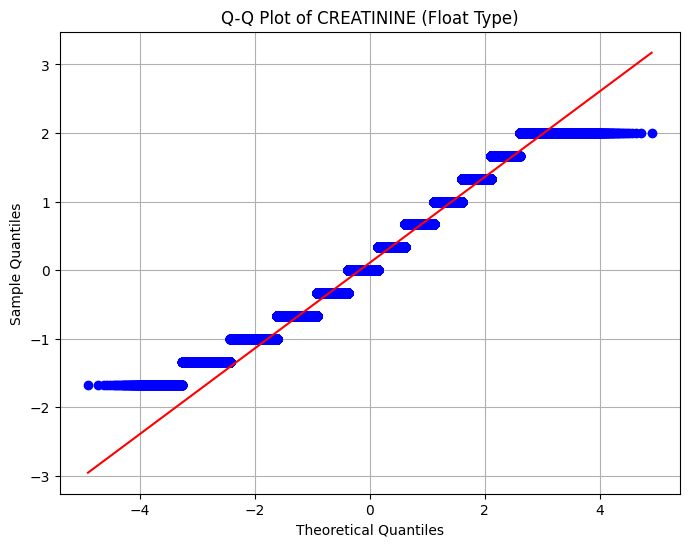

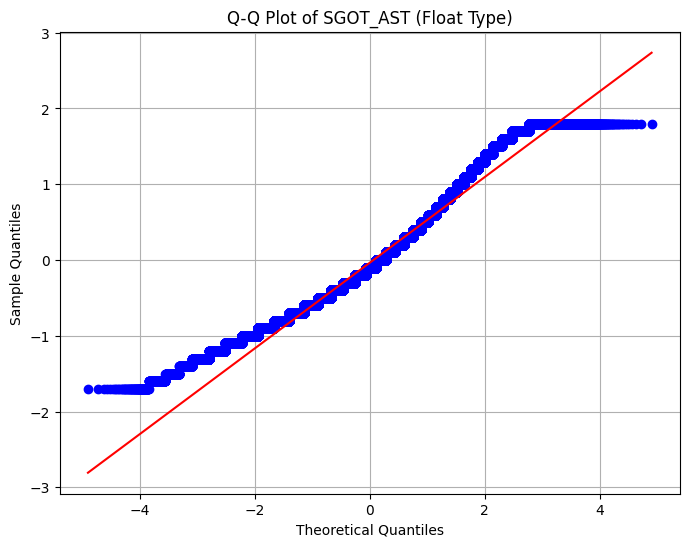

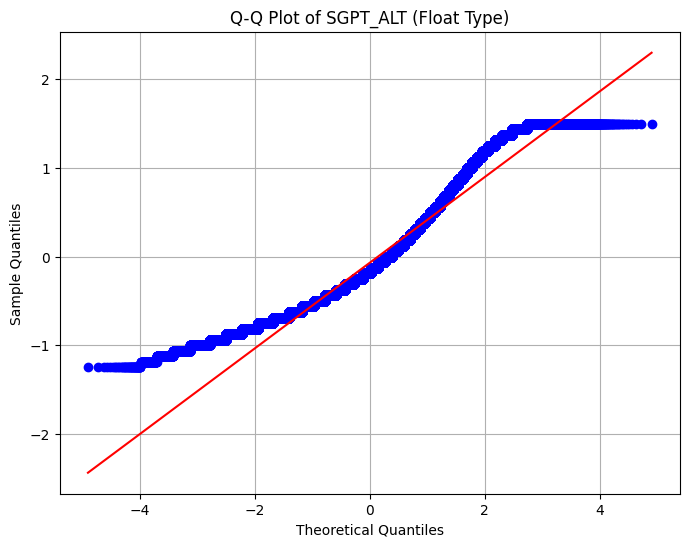

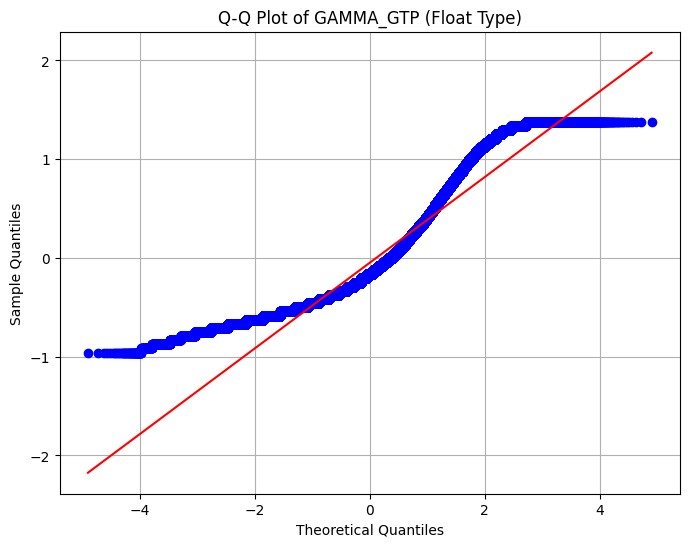

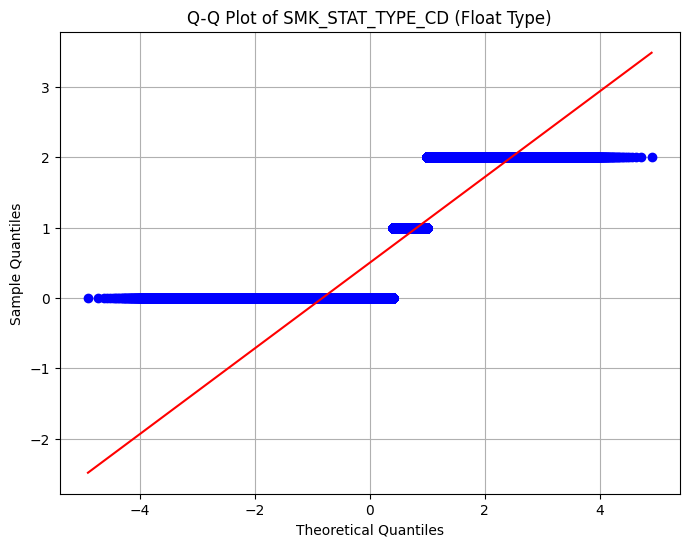

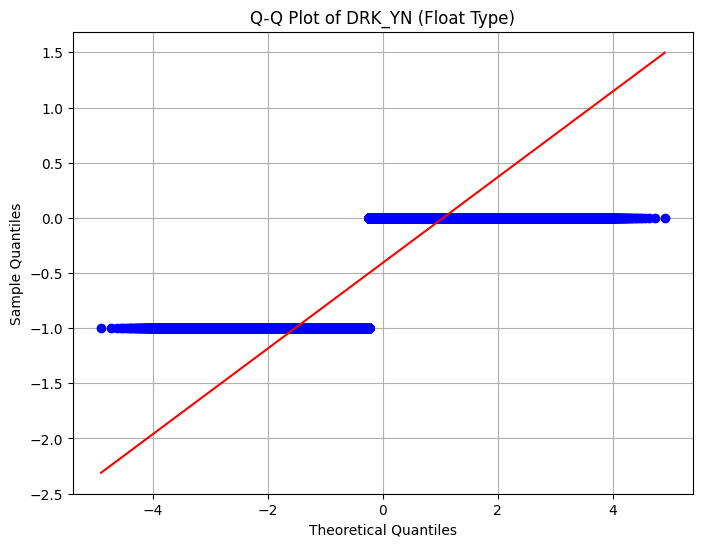

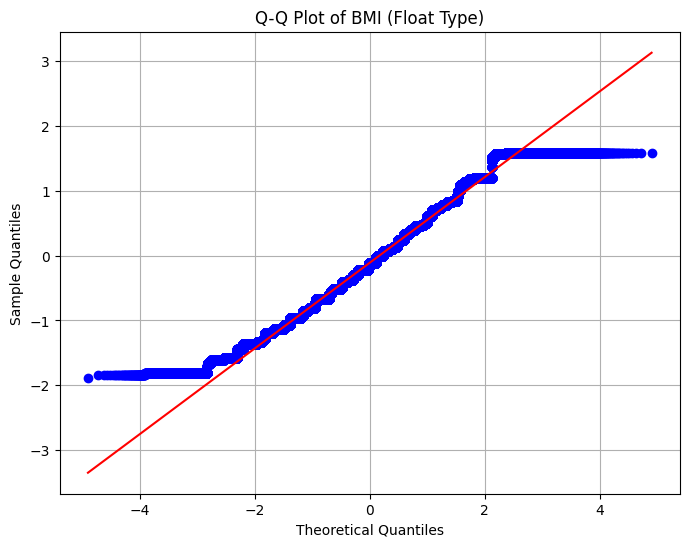

In [ ]:
from scipy import stats
float_cols = df.select_dtypes(include=['float64']).columns

for col in float_cols:
    plt.figure(figsize=(8, 6))
    stats.probplot(df[col], dist="norm", plot=plt)
    plt.title(f'Q-Q Plot of {col} (Float Type)')
    plt.xlabel('Theoretical Quantiles')
    plt.ylabel('Sample Quantiles')
    plt.grid(True)
    plt.show()

비만 예측

In [29]:
from sklearn.preprocessing import LabelEncoder

# LabelEncoder 객체 생성
label_encoder = LabelEncoder()

# 'OBESITY' 열의 고유한 범주 확인 (순서 파악에 도움)
print(df['OBESITY'].unique())

# 변환할 순서 정의 (실제 순서에 맞춰 수정해야 함)
order = ['normal', 'pre', 'class1', 'class2', 'class3'] # 예시 순서

# 명시적으로 순서에 따라 매핑
mapping = {category: i for i, category in enumerate(order)}

# 'OBESITY' 열 변환
df['OBESITY_encoded'] = df['OBESITY'].map(mapping)

# 변환 결과 확인
print(df[['OBESITY', 'OBESITY_encoded']].head())

['class1' 'pre' 'normal' 'class2' 'class3']
  OBESITY  OBESITY_encoded
0  class1                2
1     pre                1
2  class1                2
3  class1                2
4  normal                0


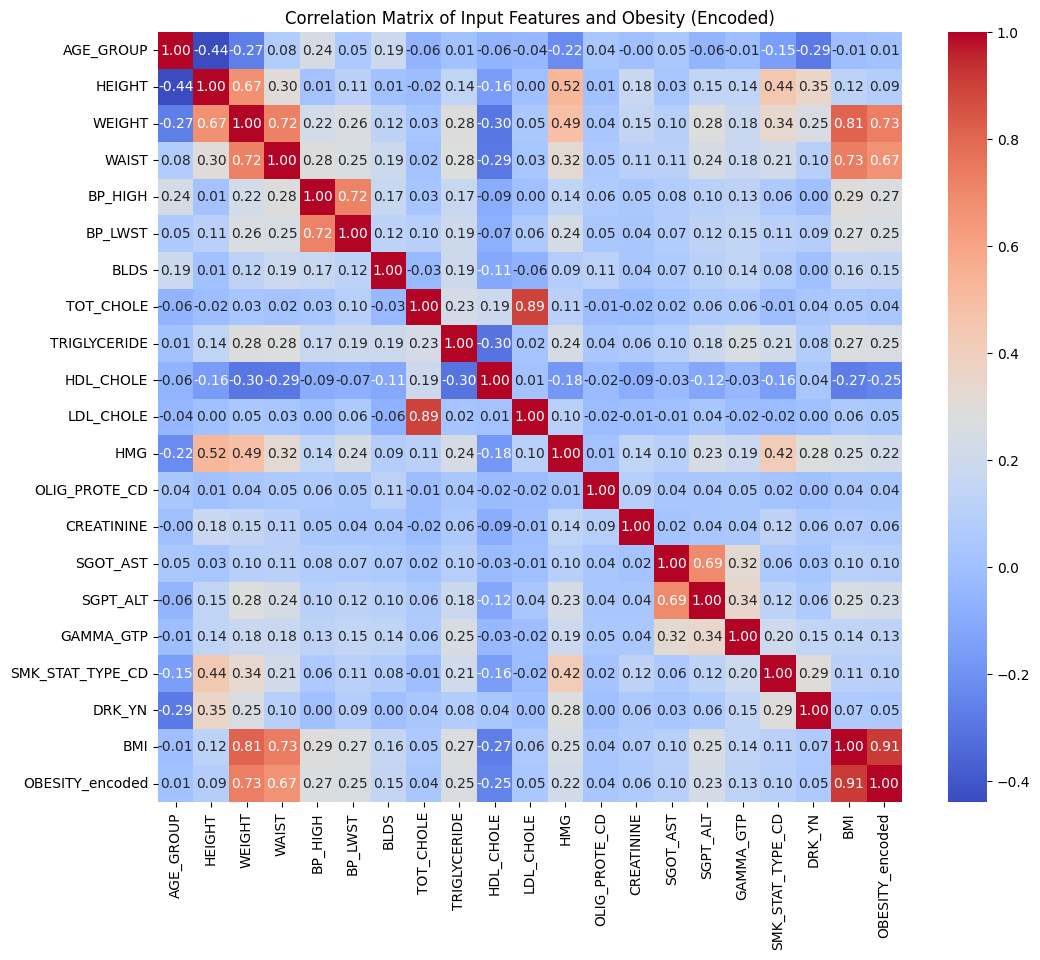

In [19]:
# 1. 비만과 독립 변수들 간 상관관계
correlation_matrix = df[input_features + ['OBESITY_encoded']].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Input Features and Obesity (Encoded)')
plt.show()


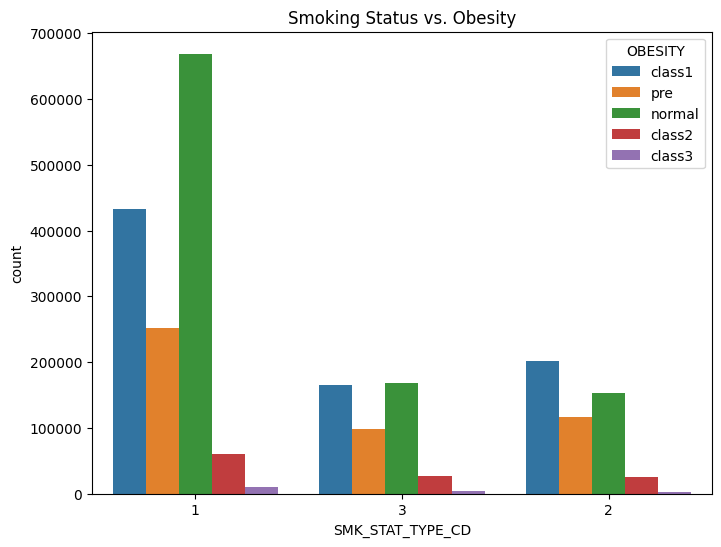

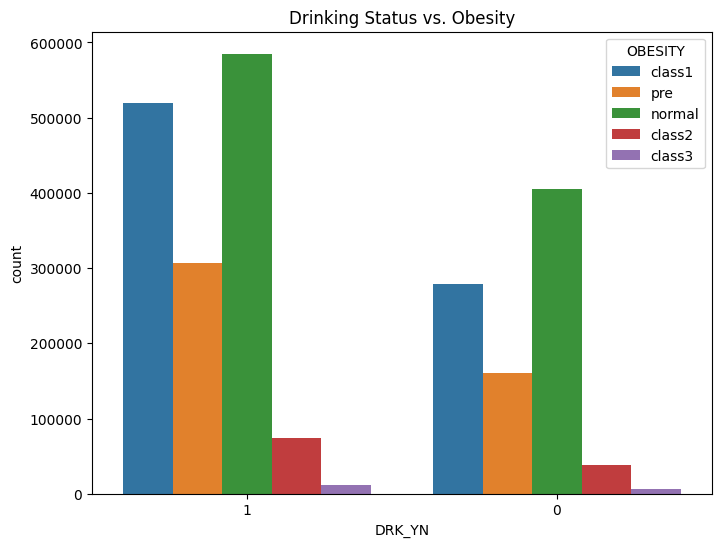

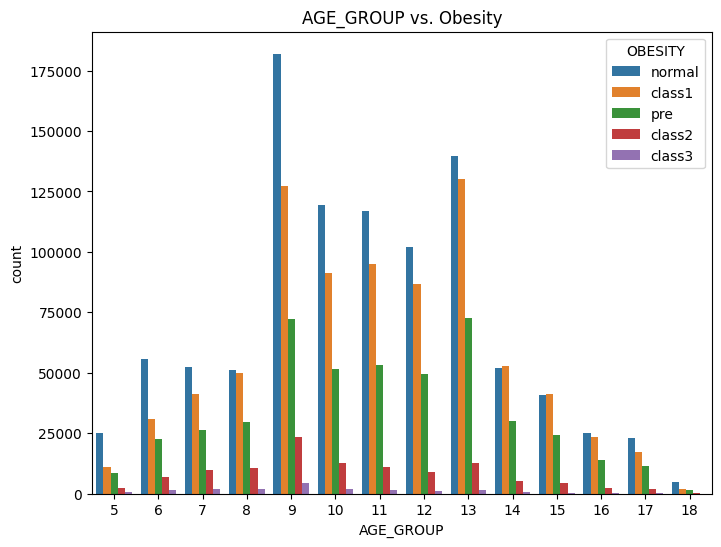

In [43]:
# 2.흡연, 음주, 나이와 비만
plt.figure(figsize=(8, 6))
sns.countplot(x='SMK_STAT_TYPE_CD', hue='OBESITY', data=df)
plt.title('Smoking Status vs. Obesity')
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(x='DRK_YN', hue='OBESITY', data=df)
plt.title('Drinking Status vs. Obesity')
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(x='AGE_GROUP', hue='OBESITY', data=df)
plt.title('AGE_GROUP vs. Obesity')
plt.show()

In [23]:
# 독립 변수
input_features = ["AGE_GROUP", "HEIGHT", "WEIGHT", "WAIST", "BP_HIGH", "BP_LWST", "BLDS", "TOT_CHOLE", "TRIGLYCERIDE", "HDL_CHOLE", "LDL_CHOLE", "HMG", "OLIG_PROTE_CD", "CREATININE", "SGOT_AST", "SGPT_ALT", "GAMMA_GTP", "SMK_STAT_TYPE_CD", "DRK_YN", "BMI"]
numerical_features =[["HEIGHT", "WEIGHT", "WAIST", "BP_HIGH", "BP_LWST", "BLDS", "TOT_CHOLE", "TRIGLYCERIDE", "HDL_CHOLE", "LDL_CHOLE", "HMG", "OLIG_PROTE_CD", "CREATININE", "SGOT_AST", "SGPT_ALT", "GAMMA_GTP", "BMI"]]

# 이상치 제거
for col in numerical_features:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # NumPy 배열로 변환 후 clip 적용 및 Series로 다시 할당
    df[col] = np.clip(df[col].values, lower_bound, upper_bound)

# 흡연이랑 음주 범주형으로
df['SMK_STAT_TYPE_CD'] = df['SMK_STAT_TYPE_CD'].astype(str)
df['DRK_YN'] = df['DRK_YN'].astype(str)

display(df.head())

,YEAR,ID,SEX,AGE_GROUP,SIDO,HEIGHT,WEIGHT,WAIST,BP_HIGH,BP_LWST,BLDS,TOT_CHOLE,TRIGLYCERIDE,HDL_CHOLE,LDL_CHOLE,HMG,OLIG_PROTE_CD,CREATININE,SGOT_AST,SGPT_ALT,GAMMA_GTP,SMK_STAT_TYPE_CD,DRK_YN,BMI,OBESITY,DYSLIPIDEMIA,DIABETES,HYPERTENSION,LIVER_ABNORMAL,KIDNEY_ABNORMAL,ANEMIA,OBESITY_encoded
0,2017,1,1,8,43,170.0,75.0,90.0,120.0,80.0,99.0,193.0,92.0,48.0,126.0,17.1,1.0,1.0,21.0,35.0,40.0,1,1,26.0,class1,False,normal,pre,False,False,False,2
1,2017,2,1,7,11,180.0,80.0,89.0,130.0,82.0,106.0,228.0,121.0,55.0,148.0,15.8,1.0,0.9,20.0,36.0,27.0,3,0,24.7,pre,False,pre,pre,False,False,False,1
2,2017,3,1,9,41,165.0,75.0,91.0,120.0,70.0,98.0,136.0,104.0,41.0,74.0,15.8,1.0,0.9,44.0,32.0,68.0,1,0,27.5,class1,False,normal,pre,True,False,False,2
3,2017,4,1,11,48,175.0,80.0,91.0,145.0,87.0,95.0,201.0,106.0,76.0,104.0,17.6,1.0,1.1,29.0,34.0,18.0,1,0,26.1,class1,False,normal,stage1,False,False,False,2
4,2017,5,1,11,30,165.0,60.0,80.0,138.0,82.0,101.0,199.0,104.0,61.0,117.0,13.8,1.0,0.8,19.0,12.0,25.0,1,0,22.0,normal,False,pre,pre,False,False,False,0


데이터 분할

In [35]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df[input_features]
y = df['OBESITY']

# Split data into training and temporary sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Split temporary set into validation and testing sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

In [36]:
print(X_train.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1909210 entries, 1559693 to 750150
Data columns (total 20 columns):
 #   Column            Dtype  
---  ------            -----  
 0   AGE_GROUP         int64  
 1   HEIGHT            float64
 2   WEIGHT            float64
 3   WAIST             float64
 4   BP_HIGH           float64
 5   BP_LWST           float64
 6   BLDS              float64
 7   TOT_CHOLE         float64
 8   TRIGLYCERIDE      float64
 9   HDL_CHOLE         float64
 10  LDL_CHOLE         float64
 11  HMG               float64
 12  OLIG_PROTE_CD     float64
 13  CREATININE        float64
 14  SGOT_AST          float64
 15  SGPT_ALT          float64
 16  GAMMA_GTP         float64
 17  SMK_STAT_TYPE_CD  object 
 18  DRK_YN            object 
 19  BMI               float64
dtypes: float64(17), int64(1), object(2)
memory usage: 305.9+ MB
None


## Model training



학습된 로지스틱 회귀 모델의 성능을 정확도, 정밀도, 재현율, F1 점수와 ROC AUC를 사용하여 종합적으로 평가

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# 모델 객체 생성, 로지스틱 회귀 모델의 최적화 알고리즘으로 'liblinear'를 지정
logreg_model = LogisticRegression(solver='liblinear', max_iter=1000)
logreg_model.fit(X_train, y_train)

# 검증셋을 이용한 예측
y_pred = logreg_model.predict(X_val)

# 평가
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred, average='weighted', zero_division=1)
recall = recall_score(y_val, y_pred, average='weighted', zero_division=1)
f1 = f1_score(y_val, y_pred, average='weighted', zero_division=1)

try:
    roc_auc = roc_auc_score(y_val, logreg_model.predict_proba(X_val), multi_class='ovr')
except ValueError as e:
    print(f"Error calculating ROC AUC: {e}")
    roc_auc = np.nan

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC AUC: {roc_auc}")

Accuracy: 0.7855739133714085
Precision: 0.8621677020452151
Recall: 0.7855739133714085
F1 Score: 0.7305470560130257
ROC AUC: 0.9937262116450366


In [39]:
user_input = {}
for feature in input_features:
    while True:
        try:
            value = float(input(f"{feature} 값을 입력하세요: "))
            user_input[feature] = value
            break
        except ValueError:
            print("잘못된 입력입니다. 숫자를 입력해주세요.")

# 입력받은 값을 DataFrame 형태로 변환 (모델 예측 시 필요)
input_df = pd.DataFrame([user_input])
print("\n입력된 값:")
print(input_df)

AGE_GROUP 값을 입력하세요: 5
HEIGHT 값을 입력하세요: 175
WEIGHT 값을 입력하세요: 77
WAIST 값을 입력하세요: 29
BP_HIGH 값을 입력하세요: 110
BP_LWST 값을 입력하세요: 80
BLDS 값을 입력하세요: 70
TOT_CHOLE 값을 입력하세요: 50
TRIGLYCERIDE 값을 입력하세요: 44
HDL_CHOLE 값을 입력하세요: 23
LDL_CHOLE 값을 입력하세요: 435
HMG 값을 입력하세요: 45
OLIG_PROTE_CD 값을 입력하세요: 78
CREATININE 값을 입력하세요: 68
SGOT_AST 값을 입력하세요: 56
SGPT_ALT 값을 입력하세요: 88
GAMMA_GTP 값을 입력하세요: 78
SMK_STAT_TYPE_CD 값을 입력하세요: 89
DRK_YN 값을 입력하세요: 0
BMI 값을 입력하세요: 80

입력된 값:
   AGE_GROUP  HEIGHT  WEIGHT  WAIST  BP_HIGH  BP_LWST  BLDS  TOT_CHOLE  \
0        5.0   175.0    77.0   29.0    110.0     80.0  70.0       50.0   

   TRIGLYCERIDE  HDL_CHOLE  LDL_CHOLE   HMG  OLIG_PROTE_CD  CREATININE  \
0          44.0       23.0      435.0  45.0           78.0        68.0   

   SGOT_AST  SGPT_ALT  GAMMA_GTP  SMK_STAT_TYPE_CD  DRK_YN   BMI  
0      56.0      88.0       78.0              89.0     0.0  80.0  


In [42]:
# 예측 수행
predicted_class = logreg_model.predict(input_df)
print("\n예측된 비만 단계:", predicted_class[0])


예측된 비만 단계: class1


나이대별 비만 예측

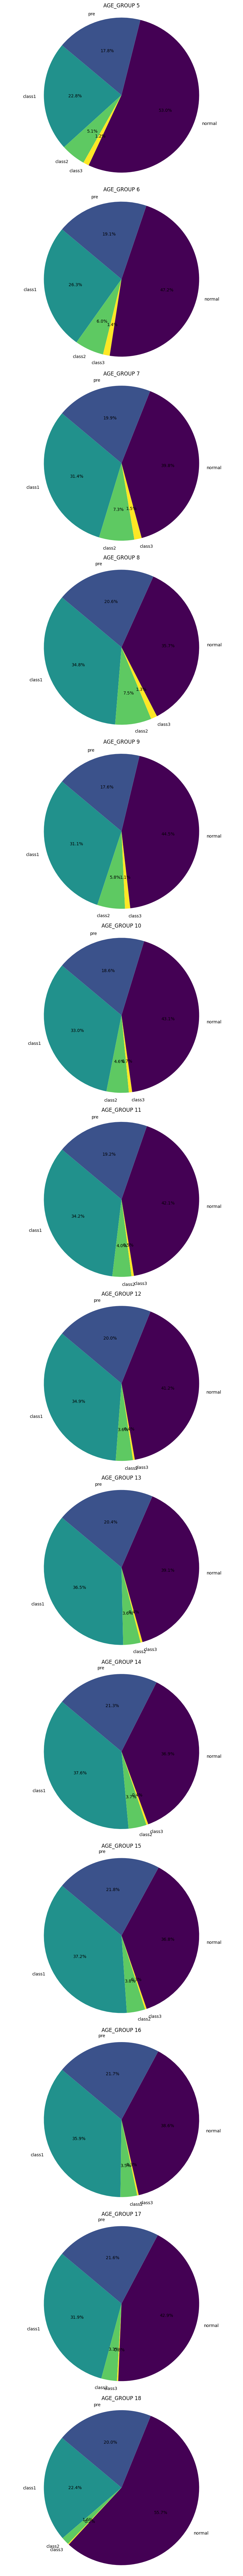

In [53]:
# OBESITY 범주 정의 (순서대로 색상 매핑 등에 활용 가능)
obesity_categories = ['normal', 'pre', 'class1', 'class2', 'class3']
colors = plt.cm.get_cmap('viridis', len(obesity_categories)) # 색상 팔레트 선택

# AGE_GROUP 별 OBESITY 범주별 개수 계산
grouped_data = df.groupby('AGE_GROUP')['OBESITY'].value_counts().unstack(fill_value=0)

# 원 그래프 그리기
fig, axes = plt.subplots(nrows=len(grouped_data), ncols=1, figsize=(8, 6 * len(grouped_data)))
if len(grouped_data) == 1:
    axes = [axes]  # 하나의 그룹일 경우 axes를 리스트 형태로 처리

for i, age_group in enumerate(grouped_data.index):
    ax = axes[i]
    sizes = grouped_data.loc[age_group].values
    labels = grouped_data.columns
    ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=[colors(obesity_categories.index(label)) for label in labels])
    ax.axis('equal')  # 원이 찌그러지지 않도록 비율 유지
    ax.set_title(f'AGE_GROUP {age_group}')

plt.tight_layout()
plt.show()

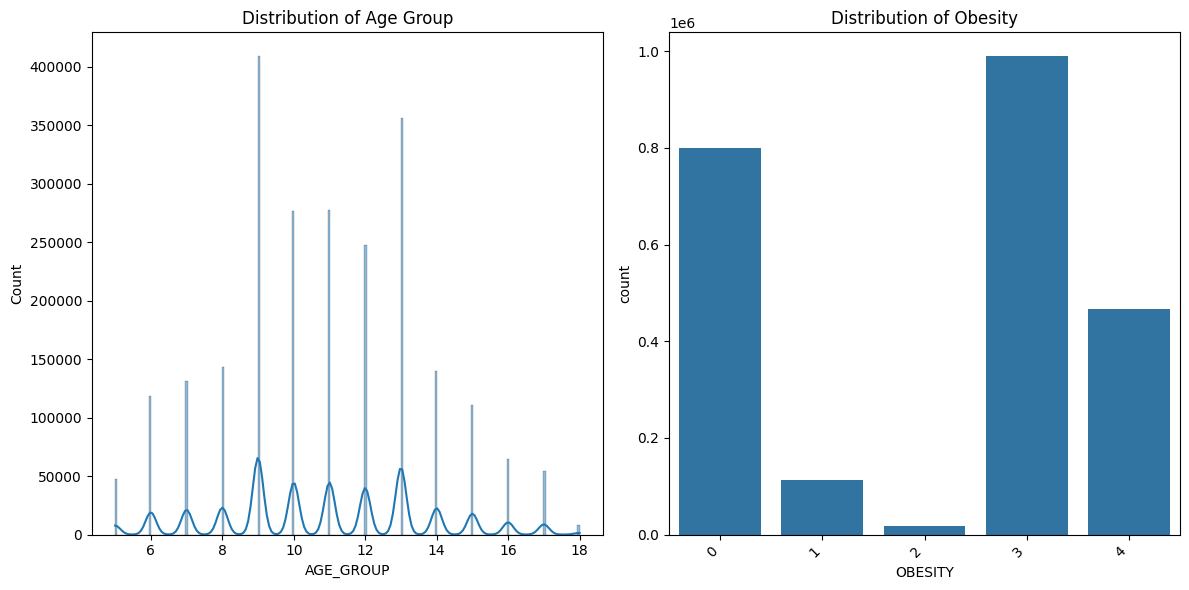

Correlation coefficient between AGE_GROUP and BMI: -0.009718574387701176


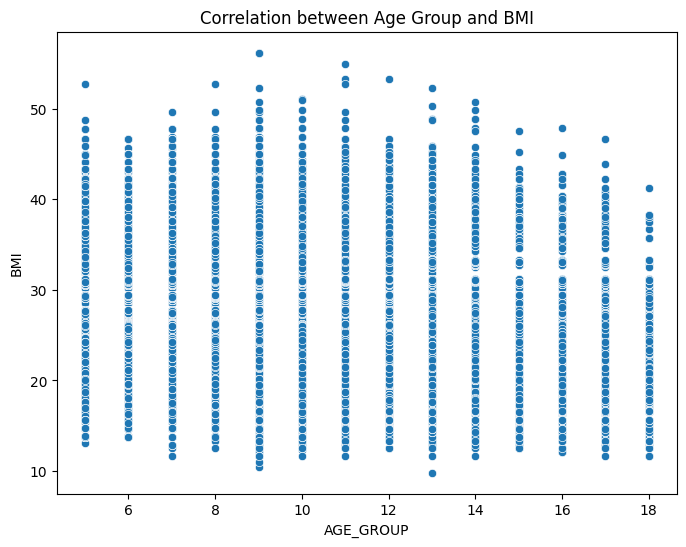

OBESITY,0,1,2,3,4
AGE_GROUP,,,,,
5,10897,2443,575,25305,8491
6,31064,7104,1648,55861,22555
7,41323,9616,2033,52304,26146
8,49775,10796,1869,51104,29478
9,127110,23625,4434,181959,72061
10,91339,12827,1889,119292,51467
11,94872,10983,1403,116838,53210
12,86523,8832,938,101978,49503
13,129952,12880,1452,139467,72688


In [9]:
# Select the specified columns
selected_columns = ['AGE_GROUP', 'HEIGHT', 'WEIGHT', 'WAIST', 'BP_HIGH', 'BP_LWST', 'BLDS', 'TOT_CHOLE', 'TRIGLYCERIDE', 'HDL_CHOLE', 'LDL_CHOLE', 'HMG', 'OLIG_PROTE_CD', 'CREATININE', 'SGOT_AST', 'SGPT_ALT', 'GAMMA_GTP', 'SMK_STAT_TYPE_CD', 'DRK_YN', 'BMI', 'OBESITY']
df_selected = df[selected_columns].copy()

# Visualize distributions
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df_selected['AGE_GROUP'], kde=True)
plt.title('Distribution of Age Group')

plt.subplot(1, 2, 2)
sns.countplot(x='OBESITY', data=df_selected)
plt.title('Distribution of Obesity')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Correlation analysis
correlation_coefficient = df_selected['AGE_GROUP'].corr(df_selected['BMI']) #  Use BMI as a numerical proxy for obesity
print(f"Correlation coefficient between AGE_GROUP and BMI: {correlation_coefficient}")

plt.figure(figsize=(8, 6))
sns.scatterplot(x='AGE_GROUP', y='BMI', data=df_selected)
plt.title('Correlation between Age Group and BMI')
plt.show()

# Contingency table
contingency_table = pd.crosstab(df_selected['AGE_GROUP'], df_selected['OBESITY'])
display(contingency_table)

In [10]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = df[['AGE_GROUP', 'BMI', 'SMK_BP_HIGH', 'BP_HIGH', 'BP_LWST', 'AGE_GROUP_6', 'AGE_GROUP_7', 'AGE_GROUP_8', 'AGE_GROUP_9', 'AGE_GROUP_10', 'AGE_GROUP_11', 'AGE_GROUP_12', 'AGE_GROUP_13', 'AGE_GROUP_14', 'AGE_GROUP_15', 'AGE_GROUP_16', 'AGE_GROUP_17', 'AGE_GROUP_18']]
y = df['OBESITY']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1909210, 18)
X_test shape: (477303, 18)
y_train shape: (1909210,)
y_test shape: (477303,)
